This file is the code infrastructure to follow along with the experiment from the paper.

In [2]:
from matplotlib.colors import ListedColormap
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import random

In [10]:
class BML:
    def __init__(self, n, m):
        """
        Sets up an empty grid for a biham-middleton-levine model.
        
        args:
            n: int length of grid
            m: int width of grid     
        """
        self.array = np.zeros((n, m), dtype=np.int8)
        self.n = n
        self.m = m
        self.cmap = ListedColormap(['white', '#95d0fc', '#ff474c'])
        self.t = 0
        self.no_change = []
        

    def start_small(self):
        """
        A preset starting config with 1 blue cell and 2 red cells.
        """
        self.array[0, self.m//2] = 1
        self.array[0, self.m//2 +1] = 2
        self.array[self.n//2, 0] = 2

    def start_density(self, density):
        """
        Randomly adds red and blue cells throughout a grid to a specific density.

        args:
            density: an int between 0 anf 1 to determine how full the grid is
        """
        self.array = np.random.choice([0,1,2], size=(self.n,self.m), p=[1-density, density/2, density/2])


    def step(self, color):
        """
        Move all blue cells one over to the right if the next cell is empty.

            args: 
                color: an int, 1 or 2, representing the color that is stepping
        """
        if color == 2:
            self.array = self.array.T
        movement = False
        for row in self.array:
            cell_0 = row[0]
            i = 0
            while i  < len(row):
                if i == len(row) - 1:
                    if row[i] == color and cell_0 == 0:
                        row[i] = 0
                        row[0] = color
                        movement = True
                    break
                else:
                    if row[i] == color and row[i+1] == 0:
                        row[i] = 0
                        row[i+1] = color
                        i += 2
                        movement = True
                    else:
                      i+=1
        if movement == False:
            self.no_change.append(self.t)
        if color == 2:
            self.array = self.array.T

    def loop(self, steps=1):
        """
        Create complete cycles of blue and then red cell moving.

        args:
            steps: an int of the number of cycles
        """
        for _ in range(steps):
            self.step(1)
            self.step(2) 
            self.t += 1
            

    def animate(self, frames=1, interval=None):
        """
        Animates the cycles.

        args:
            frames: an int of the number of frames
            interval: an int of the time to put between frames
        """
        plt.figure()
        try:
            for _ in range(frames-1):
                self.draw()
                plt.show()
                if interval:
                    sleep(interval)
                self.loop()
                clear_output(wait=True)
            self.draw()
            plt.show()
        except KeyboardInterrupt:
            pass

    def draw(self, start=0, end=None):
      """
      Draw the current grid.

      args:
        start: an int index to represent where to start displaying
        end: an int index to represent where to stop displaying
      """
      a = self.array[:, start:end]
      plt.imshow(a, cmap=self.cmap, alpha=0.7)

      # turn off axis tick marks
      plt.xticks([])
      plt.yticks([])


In [11]:
def measure(size, density, loops, depth):
    no_times = []
    speed_counter = 0
    for _ in range(loops):

        bml = BML(size, size)
        bml.start_density(density)
        bml.loop(depth)
        i = 0
        found = False
        while i+1<len(bml.no_change):
            if bml.no_change[i] == bml.no_change[i+1]:
                print(bml.no_change[i], "this is it", density)
                no_times.append(bml.no_change[i])
                found = True
                break
            i += 1
        if not found:
            print("speed one")
            speed_counter += 1
            
    print(no_times)
    print("Speed counter:", speed_counter)
    if len(no_times):
        avg = sum(no_times) / len(no_times)
    else:
        avg = 0
    return avg, speed_counter

measure(50, .45, 5, 20)

speed one
speed one
speed one
speed one
speed one
[]
Speed counter: 5


(0, 5)

In [3]:
# size 100
density = increment_list = [i / 100 for i in range(0, 101)]
stop = []

for i in range(len(density)):
    avg, speed_counter = measure(250, density[i], 5, 2000)
    stop.append(avg)

print(stop)

NameError: name 'measure' is not defined

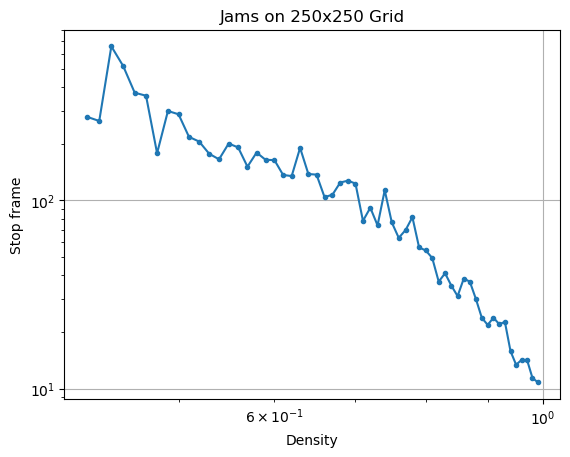

In [10]:
density = increment_list = [i / 100 for i in range(0, 101)]
den_10 = [0.0, 0.0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 202.0, 142.0, 0, 0, 0, 0, 0, 401.0, 385.0, 277.0, 0, 0, 112.0, 121.33333333333333, 80.33333333333333, 0, 35.5, 367.0, 145.0, 90.4, 139.66666666666666, 19.333333333333332, 191.8, 131.5, 50.4, 87.2, 26.0, 31.2, 105.2, 27.4, 26.0, 50.25, 24.8, 34.0, 34.0, 23.0, 14.2, 15.6, 21.6, 18.8, 16.6, 9.6, 15.2, 13.0, 16.4, 19.0, 15.2, 13.4, 10.8, 10.0, 8.0, 6.4, 8.4, 3.6, 9.0, 6.4, 7.6, 5.8, 4.6, 4.0, 2.2, 1.8, 0.0]
den_50 = [0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 278.0, 264.0, 658.0, 517.5, 373.0, 359.6666666666667, 178.0, 298.3333333333333, 286.6, 217.4, 205.2, 176.8, 165.2, 200.4, 191.0, 151.0, 179.4, 164.2, 163.6, 136.4, 134.6, 190.0, 138.0, 137.0, 104.0, 107.2, 124.4, 127.2, 122.8, 77.8, 91.4, 73.6, 113.2, 76.4, 63.2, 69.6, 81.4, 56.2, 54.2, 49.4, 37.0, 41.0, 35.2, 31.0, 38.4, 37.0, 30.0, 23.8, 21.8, 23.8, 22.0, 22.6, 15.8, 13.4, 14.2, 14.2, 11.4, 10.8, 0.0]
den_50_10 = [0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 328.0, 532.5, 505.5, 279.0, 395.6, 323.0, 341.85714285714283, 290.8333333333333, 279.75, 362.6666666666667, 234.33333333333334, 197.25, 246.11111111111111, 273.2, 182.5, 191.77777777777777, 177.11111111111111, 190.7, 197.7, 149.4, 182.6, 167.6, 129.0, 141.2, 122.9, 113.9, 123.7, 117.6, 121.2, 96.9, 78.7, 99.7, 74.0, 78.2, 70.2, 66.3, 59.6, 63.5, 57.6, 53.3, 49.5, 45.8, 40.0, 37.6, 36.9, 34.6, 29.4, 31.6, 30.2, 26.7, 27.0, 20.7, 20.3, 16.4, 17.5, 18.1, 17.6, 13.7, 10.0, 8.3, 0.0]
den_100 = [0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 548.0, 0, 512.0, 0, 536.5, 525.0, 493.5, 473.5, 490.4, 417.2, 376.8, 430.75, 376.75, 451.5, 375.2, 311.8, 494.4, 366.8, 375.2, 340.6, 333.4, 295.6, 337.8, 297.4, 301.4, 258.8, 246.6, 171.4, 164.6, 228.0, 160.4, 159.8, 135.4, 133.4, 106.8, 112.8, 113.0, 83.4, 97.0, 97.8, 69.0, 69.8, 61.8, 49.2, 59.0, 51.8, 52.0, 51.8, 39.0, 44.2, 41.4, 35.4, 34.4, 30.2, 31.6, 25.8, 19.0, 18.6, 17.6, 19.2, 13.4, 12.4, 0.0]
den_150 = [0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 800.0, 0, 675.0, 576.0, 712.3333333333334, 646.25, 785.0, 646.6666666666666, 540.5, 530.75, 623.25, 625.2, 525.4, 530.0, 502.2, 578.5, 582.6, 597.0, 490.6, 523.4, 327.2, 341.8, 472.8, 444.0, 355.4, 297.4, 245.8, 246.0, 230.0, 175.0, 199.6, 169.2, 204.8, 153.0, 132.2, 141.8, 119.0, 122.4, 96.6, 100.0, 107.2, 92.2, 87.2, 76.8, 81.2, 73.0, 58.0, 57.8, 54.6, 48.4, 49.8, 37.8, 37.8, 40.6, 41.4, 32.8, 30.0, 25.8, 21.4, 19.4, 19.4, 20.6, 18.8, 0.0]
den_250 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1018.0, 1206.0, 990.0, 1047.0, 893.4, 1611.3333333333333, 1035.5, 738.5, 847.0, 1254.0, 1117.3333333333333, 847.0, 1087.25, 1194.0, 979.6, 765.6, 840.0, 863.8, 713.8, 700.2, 639.6, 571.0, 817.6, 629.4, 551.4, 448.2, 460.6, 434.8, 429.6, 419.2, 304.6, 240.2, 213.4, 200.2, 212.8, 176.8, 156.6, 142.8, 133.0, 126.6, 107.2, 101.6, 112.8, 93.6, 80.8, 91.4, 90.8, 82.4, 56.6, 67.6, 63.4, 52.6, 58.0, 48.0, 58.0, 41.2, 40.4, 33.8, 30.8, 27.6, 26.6, 21.8, 18.4, 15.4, 0.0]
# Plotting the lists

# Filter out data points equal to 0
filtered_density = []
filtered_den_250 = []
for d, d250 in zip(density, den_50):
    if d250 != 0:
        filtered_density.append(d)
        filtered_den_250.append(d250)

# Plotting the filtered data
plt.loglog(filtered_density, filtered_den_250, marker='.')






#plt.plot(density, den_250, marker='.')
#plt.loglog(density, den_250, marker='.')

# Adding labels and title
plt.xlabel('Density')
plt.ylabel('Stop frame')
plt.title('Jams on 250x250 Grid')

# Display the plot
plt.grid(True)
plt.show()



Text(0.5, 1.0, 'Critical Density on Various Grid Sizes')

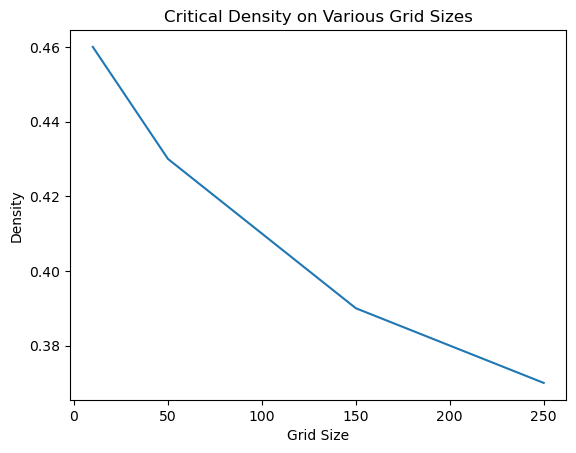

In [7]:
d10 = 47
d50 = 43
d100 = 41
d150 = 39
d250 = 37
critical_point = [.46,.43,.41,.39,.37]
grid_size = [10, 50, 100, 150, 250]
plt.plot(grid_size,critical_point)

plt.xlabel('Grid Size')
plt.ylabel('Density')
plt.title('Critical Density on Various Grid Sizes')



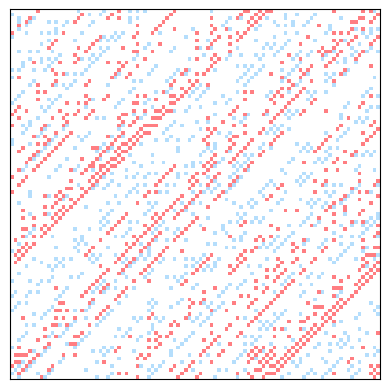

In [28]:
size = 100
density = .2
bml = BML(size, size)
bml.start_density(density)
bml.animate(500)
